<a href="https://www.kaggle.com/code/nirmit27/indian-startup-analysis?scriptVersionId=158118618" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### ***Importing the Dataset***

In [2]:
df = pd.read_csv('/kaggle/input/indian-startup-funding/startup_funding.csv')

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


### ***Dropping the Remark column and setting the Index column***

In [3]:
df.drop(columns = ['Remarks'],inplace = True)
df.set_index('Sr No', inplace=True)

### ***Renaming the columns***

In [4]:
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'
}, inplace=True)

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


### ***Stripping and Replacing***

In [5]:
df.amount = df.amount.str.lstrip('\\xc2\\xa0')
df.amount = df.amount.str.replace('N/A', '0')
df.amount = df.amount.str.replace(',', '')
df.amount = df.amount.str.replace('unknown', '0')
df.amount = df.amount.str.replace('undisclosed', '0')
df.amount = df.amount.str.replace('Undisclosed', '0')
df.amount = df.amount.str.rstrip('+')

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


### ***Typecasting the amount values to float64***

In [6]:
df.amount = df.amount.astype(float)

df.amount.dtype

dtype('float64')

### ***Cleaning Startups column***

In [7]:
df.startup = df.startup.str.replace("http://", '')
df.startup = df.startup.str.replace(".in", '')
df.startup = df.startup.str.replace(".com", '')

df.startup = df.startup.str.strip("\\xe2\\x80\\x99")
df.startup = df.startup.str.strip('"')
df.startup = df.startup.str.replace('\\', '')

df[df['startup'].str.contains("Rapido")]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
504,21/11/2017,Rapido,Technology,Bike and Taxi pooling online platform,Hyderabad,"Skycatcher Fund, Aravind Sanka",Seed/Angel Funding,3.292300e+05
622,25/09/2017,Rapido,Consumer Internet,Bike Aggregator Mobile App,Bangalore,Battery Road Digital Holdings LLC,Seed Funding,4.220000e+05
1781,18/04/2016,Rapido,Consumer Internet,Bike Aggregator App,Bangalore,"Pawan Munjal, AdvantEdge Partners, Astarc Vent...",Private Equity,NaN


### ***Normalized Conversion to Rupees***

In [8]:
def to_inr(dollar):
    inr = dollar * 83.17
    return inr/10000000

df['amount'] = df['amount'].apply(to_inr)

df.iloc[2604:2610, :]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
2605,09/07/2015,c2xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,0.000000
2606,09/07/2015,c2xa0Notesgen,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,0.000000
2607,\\xc2\\xa010/7/2015,c2xa0Infinity Assuranc,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,4.990200
2608,10/07/2015,c2xa0Footprints Education,\\xc2\\xa0Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,5.697145
2609,10/07/2015,c2xa0Loylty Rewards,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,160.933950
2610,13/07/2015,c2xa0Ameyo,\\xc2\\xa0Contact Center Software Platform,NaN,\\xc2\\xa0Gurgaon,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,41.585000


### ***Stripping the columns startup, vertical, city, investors and date***

In [9]:
def colstrip(df, cols):
    for col in cols:
        df[col] = df[col].str.lstrip('\\xc2\\xa0')
        
colstrip(df, ['startup', 'vertical', 'city', 'investors'])

df.investors = df.investors.str.replace('\\', '')

df.at[4, 'startup'] = 'Wealth Bucket'

# x = df[df.date.str.contains("2017")]
# x[x.investors.str.contains("Kedaraa").values == True]

df.at[465, 'investors'] = df.at[465, 'investors'].strip('"')
df.at[465, 'investors'] = df.at[465, 'investors'][:-1]
df.at[465, 'investors']

'Kedaraa Capital, Ontario Teachers'

### ***Fixing the 'dates' column*** using **Excel**

In [10]:
df.date = df.date.str.lstrip('\\xc2\\xa0')

dt = [193, 2572, 2776, 2777, 2832, 3012, 3030]

df.at[dt[0], 'date'] = '5/07/2018'
df.at[dt[1], 'date'] = '1/07/2015'

for i in range(2, 6):
    df.at[dt[i], 'date'] = df.at[dt[i], 'date'].replace('.', '/')

df.at[dt[6], 'date'] = '22' + df.at[dt[6], 'date']
df.at[dt[6], 'date'] = df.at[dt[6], 'date'].replace('//', '/')

df.date = pd.to_datetime(df.date, format='mixed')

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600


### Getting the _month_ and _year_

In [11]:
df['month'] = pd.to_datetime(df.date).dt.month
df['year'] = pd.to_datetime(df.date).dt.year

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000,9,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493,1,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,9,2020
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000,1,2020
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600,1,2020


#### Determining the NaN ***value counts*** in all the columns

In [12]:
result = df.apply(lambda x: x.isna().value_counts())
result

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
False,3044.0,3044.0,2873,2108,2864,3020,3040,2084,3044.0,3044.0
True,NaN,NaN,171,936,180,24,4,960,NaN,NaN


### Removing the NaN values

In [13]:
rem = [col for col in result.columns if result[col].iloc[1].dtype != np.float64]
df = df.dropna(subset=rem)

df = df.dropna(subset=['date', 'startup', 'vertical',
               'city', 'investors', 'round', 'amount'])

df

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000,9,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493,1,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,9,2020
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000,1,2020
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600,1,2020
...,...,...,...,...,...,...,...,...,...,...
2099,2016-09-01,Qriyo,Consumer Internet,Online Fitness & Educational information Aggre...,Jodhpur,Idein Ventures,Seed Funding,1.330720,9,2016
2101,2016-09-01,Aisl,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,1.538645,9,2016
2102,2016-09-01,FreshMenu,Consumer Internet,Fresh Food Delivery platform,Bangalore,"Zodius Technology Fund, Lightspeed Venture Par...",Private Equity,141.389000,9,2016


### Removing duplicates from the **vertical** column

In [14]:
df[df['vertical'].str.contains('ommerce')]

def clean_vert(df):
    err = ['eCommerce', 'ECommerce', 'E-commerce', 'Ecommerce', 'E-Commerce']
    for e in err:
        df['vertical'] = df['vertical'].str.replace(e, 'E-commerce')

clean_vert(df)

df[df['vertical'].str.contains('ommerce')]

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,9,2020
9,2019-06-12,CarDekho,E-commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,582.190000,6,2019
13,2019-12-16,Licious,E-commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,249.510000,12,2019
17,2019-12-01,Lenskart,E-commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,257.827000,12,2019
28,2019-11-19,Digital Mall Asia,E-commerce,Virtual e-commerce platform,Delhi,Amour Infrastructure,Seed Funding,0.000000,11,2019
...,...,...,...,...,...,...,...,...,...,...
2069,2016-01-01,Just Buy Liv,E-commerce,B2B Marketplace for Distributors,Mumbai,Alpha Capital,Private Equity,0.000000,1,2016
2070,2016-01-01,IMbesharam,E-commerce,Adult Products Etailers,New Delhi / US,Undisclosed US Based Investors,Private Equity,33.268000,1,2016
2080,2016-01-01,SnapBizz,E-commerce,Mobile based Retail Market Ecosystem,Bangalore,"Jungle Ventures, Taurus Value Creation, Konly ...",Private Equity,59.882400,1,2016


### Finding Investors

In [15]:
investors = sorted(set(df['investors'].str.split(',').sum()))

investors

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' Aarin Capital',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Jain',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners RNT Associates',
 ' Accel Partners and G Raghunandan',
 ' Accel Partners and IDG Ventures',
 ' Accel Partners and Saama Capital',
 ' Accel Partners and Tiger Global Management.',
 ' Acumen Fund',
 ' Adi Saravanan',
 ' Aditya Agarwal',
 ' Aditya Malik & Others',
 ' Aditya Verma',
 ' Aditya Vij',
 ' AdvantEdge Partners',
 ' Adveq Management'

### Finding ***Investor Details*** , example - _IDG Ventures_

In [16]:
idgv = df[df['investors'].str.contains('IDG Ventures')]

idgv.head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.869466
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,998.040000
259,2018-05-01,Bizongo,Consumer Internet,Mumbai,Private Equity,16.634000
310,2018-06-04,POPxo,Technology,Delhi,Private Equity,45.743500
439,2017-07-12,Shakti,E-commerce,Chennai,Debt Funding,2.495100


In [17]:
idgv.groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit             998.040000
Lenskart             499.020000
Curefit              124.755000
Xpressbees           103.962500
POPxo                 71.526200
Uniphor               56.555600
HealthifyM            49.902000
CloudCherry           49.902000
Sigtupl               48.238600
Flyrob                44.080100
Aasaanjobs            41.585000
CureFit               41.585000
Bizongo               41.585000
RentMojo              41.585000
Vayana                33.268000
PlaySimpl             33.268000
Blowhorn              30.357050
Tripoto               29.869466
Active.ai             24.951000
mPaani                11.227950
Hansel.io             11.227950
Little Black Book      8.317000
Hevo Data              8.317000
Heckyl                 5.821900
Infisecur              4.990200
Shakti                 2.495100
Name: amount, dtype: float64

#### Sectors of investment

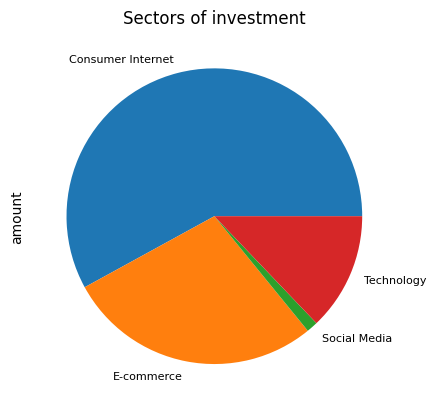

In [18]:
idgv.groupby('vertical')['amount'].sum().plot(kind='pie', fontsize=8)

plt.title('Sectors of investment')
plt.show()

#### Stages of Investment

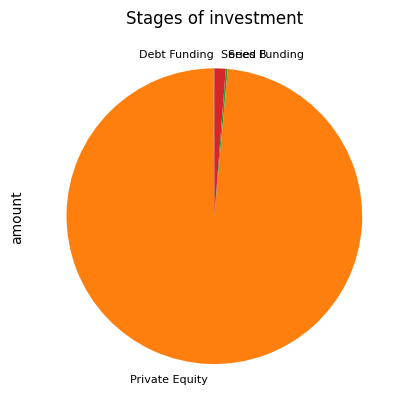

In [19]:
idgv.groupby('round')['amount'].sum().plot(kind='pie', fontsize=8, startangle=90)

plt.title('Stages of investment')
plt.show()

### Amount invested per _city_

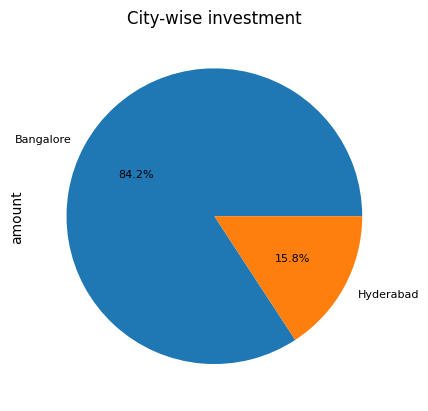

In [20]:
name = "Accel India"
x = df[df['investors'].str.contains(name)].groupby('city')[
    'amount'].sum().head()

x.plot(kind='pie', fontsize=8, autopct='%1.1f%%')
plt.title('City-wise investment')
plt.show()

### Amount invested by _year_

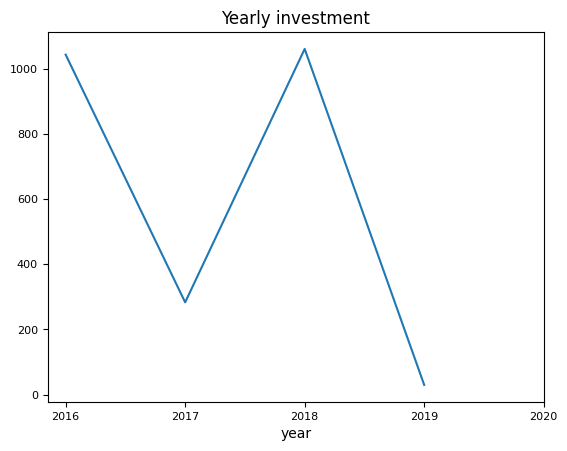

In [21]:
df['year'] = df['year'].astype(int)
ax = idgv.groupby('year')['amount'].sum().plot(fontsize=8)

ax.set_xticks(df['year'].unique())

plt.title('Yearly investment')
plt.show()

## **General Analysis**

### _Amount invested in Indian startups_

In [22]:
print(f"Maximum amount invested = {df.amount.max()}")
df['startup'].nunique()

Maximum amount invested = 32436.3


1199

In [23]:
mean = df.groupby('startup')['amount'].sum().mean()

df['month'] = pd.to_datetime(df.date).dt.month_name()

### Year and Month-wise **number of fundings**

In [24]:
df.groupby(['year', 'month'])['startup'].count().reset_index()

,year,month,startup
0,2016,April,66
1,2016,August,56
2,2016,December,42
3,2016,February,25
4,2016,January,56
5,2016,July,59
6,2016,June,53
7,2016,March,53
8,2016,May,44
9,2016,November,40


#### Making the axis-labels

In [25]:
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()

for i in range(temp_df.shape[0]):
    temp_df.at[i, 'time'] = f"{temp_df.at[i, 'month'][:3]} '{temp_df.at[i, 'year'] - 2000}"

temp_df.tail()

,year,month,amount,time
46,2019,October,6492.933691,Oct '19
47,2019,September,8.317000,Sep '19
48,2020,January,181.713093,Jan '20
49,2020,October,1247.550000,Oct '20
50,2020,September,152.690639,Sep '20


In [26]:
temp_df.drop(columns=['year', 'month'], inplace=True)
temp_df.set_index('time', inplace=True)

temp_df

,amount
time,
Apr '16,2130.299746
Aug '16,4164.180511
Dec '16,2247.810639
Feb '16,382.012286
Jan '16,3107.447442
Jul '16,3464.912102
Jun '16,1230.475199
Mar '16,2949.712277
May '16,1495.379966


### ___Tests___

#### _Overall Analysis Metrics_

In [27]:
sdf = df.groupby('startup').amount

total = round(df.amount.sum() / 100000)

max = round(sdf.max().sort_values(ascending=False).head(1).values[0] / 10000)

mean = round(sdf.sum().mean() / 100)

print(f"Overall Analysis metrics :\nTotal amount invested = {total}Cr\nMaximum Funding = {max}Cr\nAverage Funding = {mean}Cr")

Overall Analysis metrics :
Total amount invested = 2Cr
Maximum Funding = 3Cr
Average Funding = 2Cr


### Correction
 > BYJU'S **tuple**

In [28]:
df.at[1, 'amount'] = 0.01372305
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.013723,September,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493,January,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,September,2020
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000,January,2020
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600,January,2020


#### _Month on Month **Graphs**_

##### 1. Total Investment

In [29]:
tdf = df.groupby(['year', 'month'])['amount'].sum().reset_index()
tdf.amount = tdf.amount / 10000
tdf.rename(columns={'amount': 'Amount (in Cr.)'}, inplace=True)
for i in range(tdf.shape[0]):
    tdf.at[i,
           'Month'] = f"{tdf.at[i, 'month'][:3]} '{tdf.at[i, 'year'] - 2000}"
tdf.drop(columns=['year', 'month'], inplace=True)

tdf

,Amount (in Cr.),Month
0,0.213030,Apr '16
1,0.416418,Aug '16
2,0.224781,Dec '16
3,0.038201,Feb '16
4,0.310745,Jan '16
5,0.346491,Jul '16
6,0.123048,Jun '16
7,0.294971,Mar '16
8,0.149538,May '16
9,0.341721,Nov '16


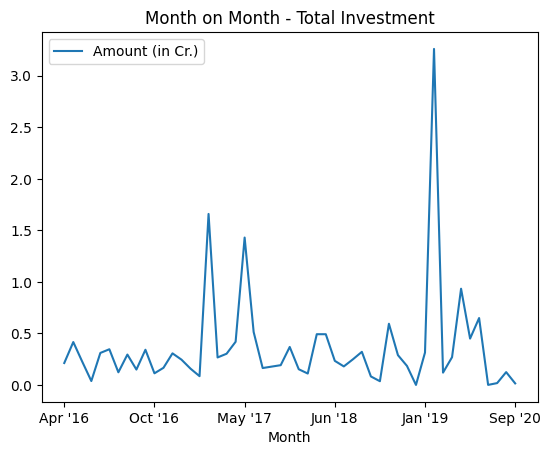

In [30]:
tdf.plot(y='Amount (in Cr.)', x='Month')
plt.title('Month on Month - Total Investment')
plt.show()

#### 2. Investment Count

In [31]:
tdf2 = df.groupby(['year', 'month'])['amount'].count().reset_index()
tdf2.rename(columns={'amount': 'No. of Investments'}, inplace=True)
for i in range(tdf2.shape[0]):
    tdf2.at[i,
            'Month'] = f"{tdf2.at[i, 'month'][:3]} '{tdf2.at[i, 'year'] - 2000}"
tdf2.drop(columns=['year', 'month'], inplace=True)

tdf2

,No. of Investments,Month
0,66,Apr '16
1,56,Aug '16
2,42,Dec '16
3,25,Feb '16
4,56,Jan '16
5,59,Jul '16
6,53,Jun '16
7,53,Mar '16
8,44,May '16
9,40,Nov '16


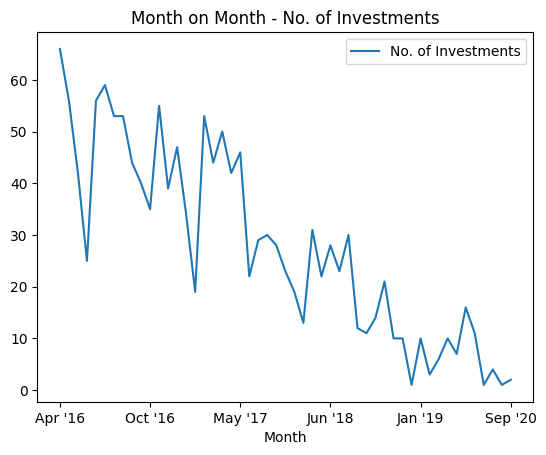

In [32]:
tdf2.plot(x='Month', y='No. of Investments')
plt.title('Month on Month - No. of Investments')
plt.show()

#### 3. Top 5 Sectors

In [33]:
ctg = df.groupby('vertical')['amount'].sum().head()
ctg = ctg.sort_values(ascending=False)

fig6 = px.pie(
    values=ctg.values,
    labels=ctg.index.values,
    names= ctg.index.values,
    height=400,
    width=600,
    color_discrete_sequence=px.colors.sequential.dense_r,
    hole=0.4)
fig6

##### 4. Top 5 Startups by _year_

In [34]:
top5 = df.groupby(['startup', 'year', 'month'])['amount'].sum().reset_index()
top5.set_index('startup', inplace=True)
top5.query("year == 2020")[['month', 'amount']]

,month,amount
startup,,
BYJU’S,September,0.013723
Fashor,January,14.970600
Mamaearth,September,152.690639
Pando,January,74.853000
Shuttl,January,66.938493
Wealth Bucket,January,24.951000
Zomato,October,1247.550000


#### 5. Top 5 Investors

In [35]:
top5 = df.groupby(['investors', 'year', 'month'])['amount'].sum().reset_index()

top5[top5.investors.str.contains('Kedaraa')]

,investors,year,month,amount
593,"Kedaraa Capital, Ontario Teachers",2017,December,162.1815


#### 6. Most Recent Investments

In [36]:
name = 'SAIF Partners'
recent = df[df['investors'] == name][['date', 'startup', 'vertical', 'city', 'round', 'amount']].sort_values(by='date', ascending=False)
recent.set_index('date', inplace=True)
recent.head()

,startup,vertical,city,round,amount
date,,,,,
2019-04-09,Cashflo,FinTech,Mumbai,Series A,27.4461
2016-11-30,Puls,Consumer Internet,Bangalore,Private Equity,4.1585
2016-07-01,Playment,Consumer Internet,Bangalore,Private Equity,5.8219


#### 7. Top 5 Biggest investments

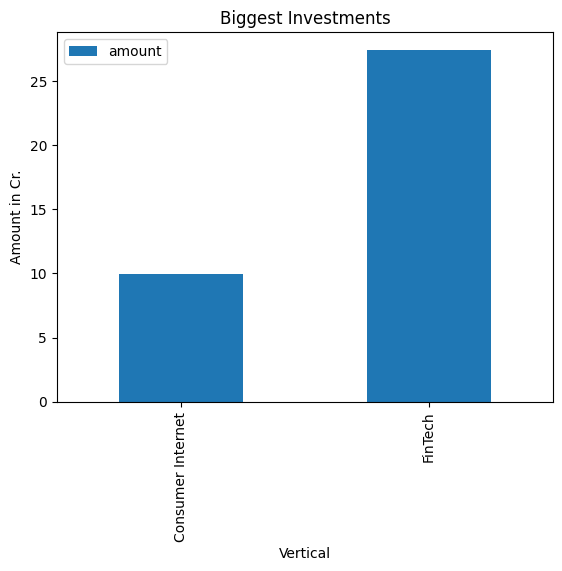

In [37]:
sec = df[df.investors == name].groupby('vertical')[['vertical', 'amount']].agg({'amount': 'sum'}).head()
sec.sort_values(by='amount', inplace=True)

sec.plot(kind='bar')
plt.title('Biggest Investments')
plt.xlabel('Vertical')
plt.ylabel('Amount in Cr.')
plt.show()

# sec

#### 8. Stages of Investment

In [38]:
stg = df[df['investors'].str.contains(name)].groupby('round')[
    'amount'].sum().head()

stg

round
Private Equity    2563.71525
Seed Funding         9.98040
Series A            27.44610
Series F             0.00000
Name: amount, dtype: float64

#### 9. Year-on-year Investment

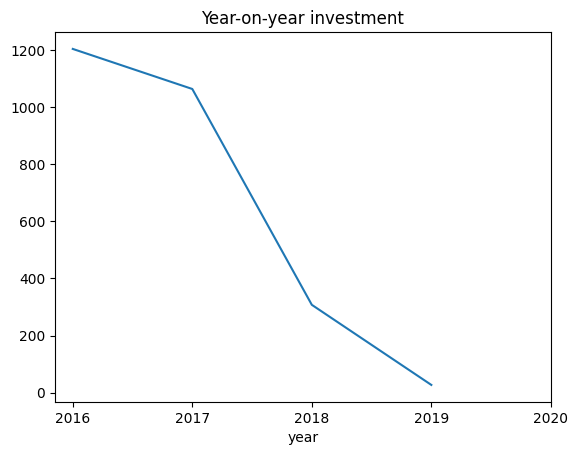

In [39]:
df.year = df.date.dt.year
yi = df[df['investors'].str.contains(name)].groupby('year').amount.sum()

plot = yi.plot(kind='line')
plot.set_xticks(df.year.unique())
plt.title('Year-on-year investment')
plt.show()

#### 10. Sectors of Investment

In [40]:
sec = df[df['investors'].str.contains(name)].groupby(
    'vertical')['amount'].sum().head()

sec

vertical
Consumer Internet    2138.71655
E-commerce            355.96760
FinTech                27.44610
Finance                12.47550
Healthcare             33.26800
Name: amount, dtype: float64

### ***Cleaned CSV***

In [41]:
df.to_csv('startup_cleaned.csv',index=False)

### ***Corrections***

In [42]:
cdf = pd.read_csv('/kaggle/working/startup_cleaned.csv')

cdf.head()

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.013723,September,2020
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493,January,2020
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,September,2020
3,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000,January,2020
4,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600,January,2020


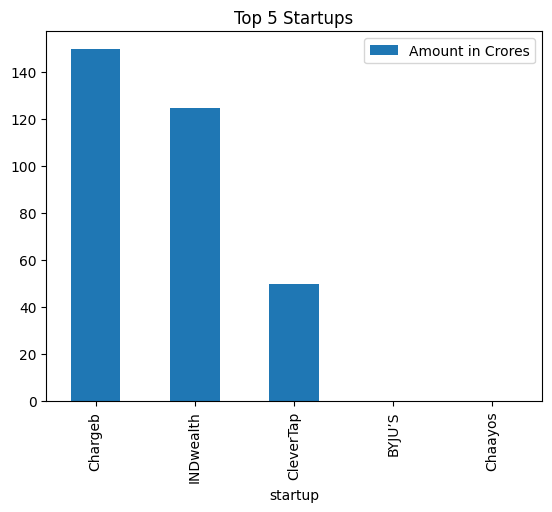

In [43]:
name = 'Tiger Global Management'

cdf.rename(columns={'amount': 'Amount in Crores'}, inplace=True)
big = cdf[cdf['investors'].str.contains(name)].groupby(
            'startup')['Amount in Crores'].sum().head()

big.sort_values(inplace=True, ascending=False)

big = big.reset_index()

big.plot(kind='bar', x='startup', y='Amount in Crores')
plt.title("Top 5 Startups")
plt.show()